In [0]:
#Create session and read dataset

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()

In [0]:
def readdf(file):
  df = spark.read.csv(file, sep = ' ', inferSchema = True)

  #Drop Nan values
  df=df.na.drop()
  
  return df  

In [0]:
file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject101.dat'
df1 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject102.dat'
df2 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject103.dat'
df3 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject104.dat'
df4 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject105.dat'
df5 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject106.dat'
df6 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject107.dat'
df7 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject108.dat'
df8 = readdf(file)

file = 'dbfs:/FileStore/shared_uploads/x20199520@student.ncirl.ie/subject109.dat'
df9 = readdf(file)

In [0]:
#Creation of a unique dataframe
df = df1.union(df2).union(df3).union(df4).union(df5).union(df6).union(df7).union(df8).union(df9)
print((df.count(), len(df.columns)))

(193871, 54)


In [0]:
#Select walking activity only
DF = df.filter(df._c1.isin(4))

In [0]:
#HR = DF.select('_c2') #select Heart Rate
#IMU = DF.select('_c20') #select Temperature values for chest
Time = DF.select('_c0') #select Time

DFM = DF.select('_c2','_c20')
print((DFM.count(), len(DFM.columns)))

(15272, 2)


(3) HR + IMU CHEST ANALYSIS

In [0]:
#DFM = IMU.join(HR)

In [0]:
#Normalization of HR and IMU seperately 
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF for converting column type from vector to double type
unlist = udf(lambda x: round(float(list(x)[0]),3), DoubleType())

Cols = DFM.columns
# Iterating over columns to be scaled
for i in Cols:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")

    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])
    
    # Fitting pipeline on dataframe
    DF = pipeline.fit(DFM).transform(DFM).withColumn(i+"_Scaled", unlist(i+"_Scaled")).drop(i+"_Vect")

In [0]:
#Assemble Vector 
from pyspark.ml.feature import VectorAssembler
Cols = DF.columns
assemble=VectorAssembler(inputCols=Cols, outputCol='features')
assembled_data=assemble.transform(DF)

In [0]:
#pip install yellowbrick

In [0]:
Y = DF.rdd.flatMap(lambda x: x).collect()
YY = np.asarray(Y).reshape(-1, 1)

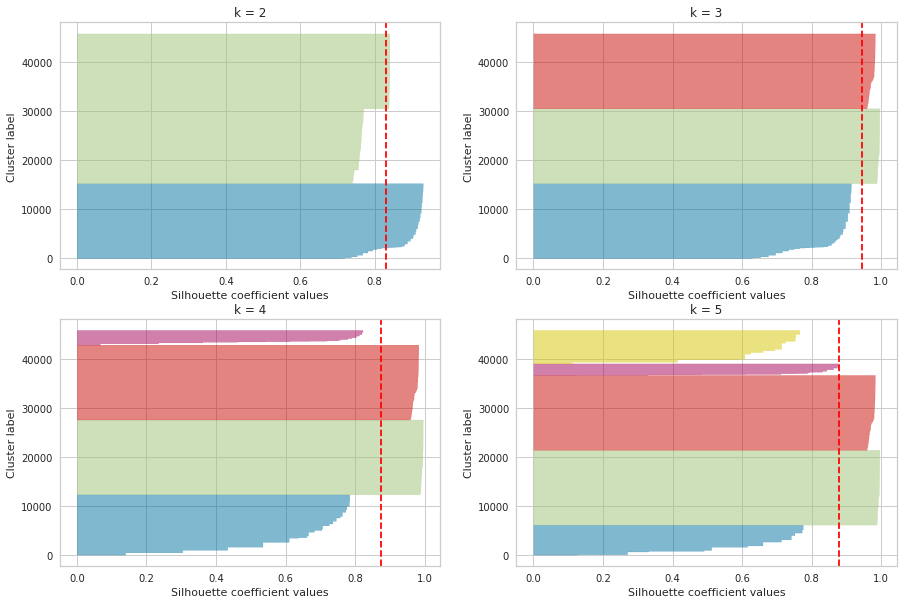

In [0]:
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_xlabel('Silhouette coefficient values')
ax[0][0].set_ylabel('Cluster label')
ax[0][0].set_title('k = 2')

ax[0][1].set_xlabel('Silhouette coefficient values')
ax[0][1].set_ylabel('Cluster label')
ax[0][1].set_title('k = 3')

ax[1][0].set_xlabel('Silhouette coefficient values')
ax[1][0].set_ylabel('Cluster label')
ax[1][0].set_title('k = 4')

ax[1][1].set_xlabel('Silhouette coefficient values')
ax[1][1].set_ylabel('Cluster label')
ax[1][1].set_title('k = 5')

for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(YY)

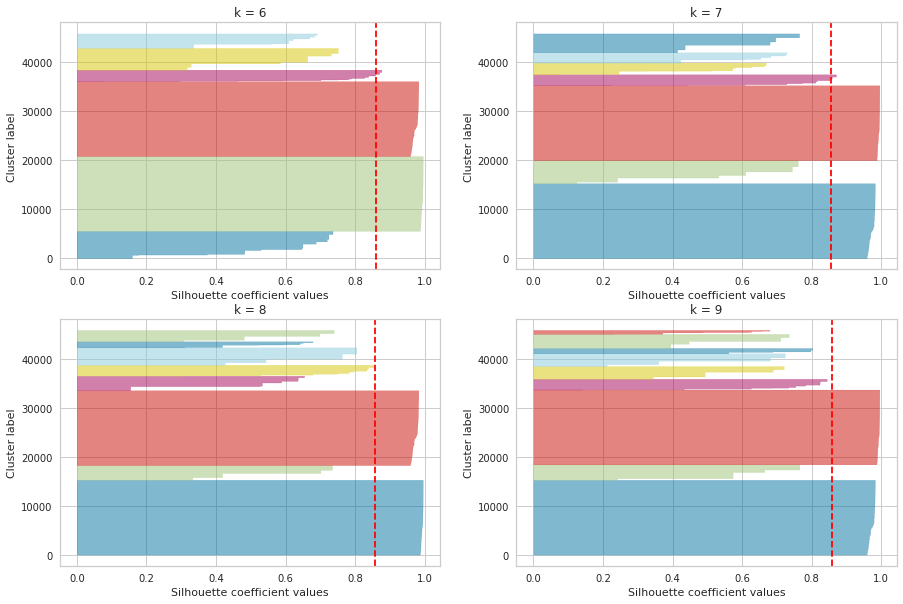

In [0]:
from yellowbrick.cluster import SilhouetteVisualizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_xlabel('Silhouette coefficient values')
ax[0][0].set_ylabel('Cluster label')
ax[0][0].set_title('k = 6')

ax[0][1].set_xlabel('Silhouette coefficient values')
ax[0][1].set_ylabel('Cluster label')
ax[0][1].set_title('k = 7')

ax[1][0].set_xlabel('Silhouette coefficient values')
ax[1][0].set_ylabel('Cluster label')
ax[1][0].set_title('k = 8')

ax[1][1].set_xlabel('Silhouette coefficient values')
ax[1][1].set_ylabel('Cluster label')
ax[1][1].set_title('k = 9')

for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i+4, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(YY)

Out[36]: Text(0, 0.5, 'Cluster label')

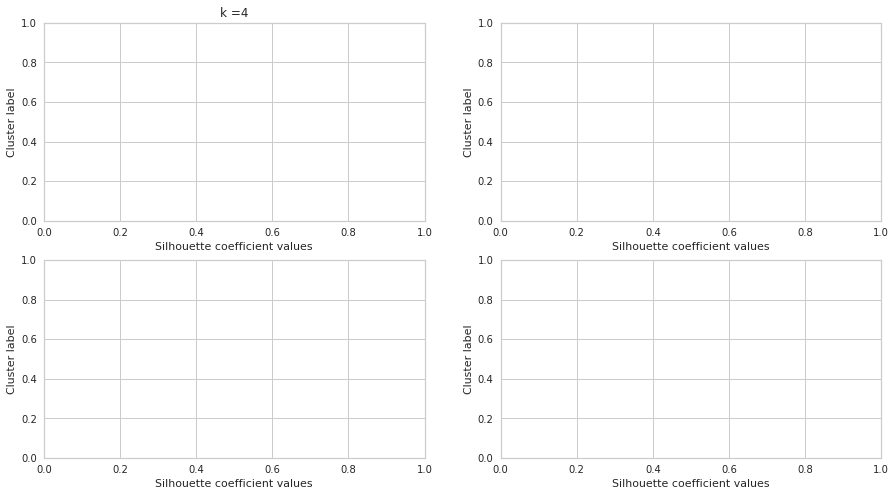

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

Out[43]: Text(0.5, 1.0, 'k = 5')

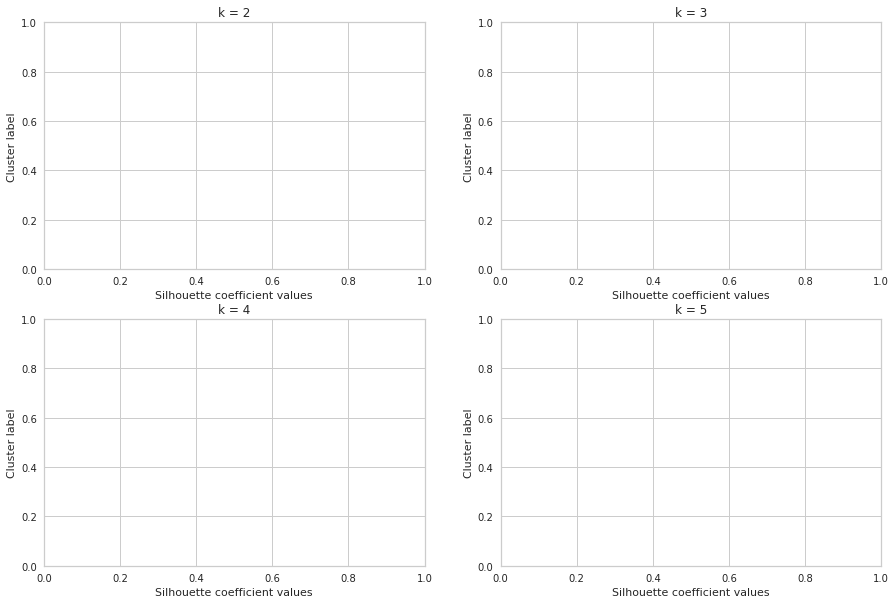

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_xlabel('Silhouette coefficient values')
ax[0][0].set_ylabel('Cluster label')
ax[0][0].set_title('k = 2')

ax[0][1].set_xlabel('Silhouette coefficient values')
ax[0][1].set_ylabel('Cluster label')
ax[0][1].set_title('k = 3')

ax[1][0].set_xlabel('Silhouette coefficient values')
ax[1][0].set_ylabel('Cluster label')
ax[1][0].set_title('k = 4')

ax[1][1].set_xlabel('Silhouette coefficient values')
ax[1][1].set_ylabel('Cluster label')
ax[1][1].set_title('k = 5')